# 루브릭 평가 기준

## 평가 문항
1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상으로 높게 나왔는가?
- 상세 기준: MSE 손실함수값 3000 이하를 달성
2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
- 상세 기준: RMSE 150 이하 달성
3. 시각화 요구사항이 정확하게 이루어졌는가?
- 상세 기준: 각 프로젝트 진행 과정에서 요구하는 데이터개수 시각화 및 예측결과 시각화를 모두 진행

# 프로젝트1-손수 설계하는 선형회귀, 당뇨병 수치

## 모듈 import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터 가져오기

In [2]:
from sklearn.datasets import load_diabetes

diabets = load_diabetes()
diabets

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
a1 = pd.DataFrame(data = diabets.data, columns = diabets.feature_names)
a1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


## array로 변환하기

In [4]:
diabets_ = a1.to_numpy()
diabets_

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## 모델에 입력할 데이터 준비하기

In [5]:
df_X = diabets_
df_y = diabets.target

In [6]:
print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


## train / test로 데이터 분리

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## 모델 준비하기
- 입력 데이터가 10개이기 때문에 10개의 w와 하나의 b를 준비

In [8]:
W = np.random.rand(10)
b = np.random.rand()
print(W)
print(b)

[0.33579635 0.04049924 0.86542723 0.59314157 0.12529453 0.39784117
 0.98399739 0.11883937 0.3229349  0.86507057]
0.3322399443456262


- 함수 구현하기

In [9]:
#for문을 통해 1~10까지 x * w를 수행하고 마지막에 b를 더해줌

def model(X, W, b):
    predictions = 0 #예측값을 저장
    
    for i in range(10):
        predictions += X[:,i] * W[i]
    predictions += b
    
    return predictions

## 손실함수 loss 구현하기
- 손실함수를 MSE 함수로 정의

In [10]:
def MSE(a,b):
    mse = ((a-b)**2).mean() #두 값의 차이의 제곱의 평균
    return mse

In [11]:
def loss(X, W, b, y):
    
    predictions = model(X, W, b)
    
    loss_ = MSE(predictions, y)
    
    return loss_

## 기울기를 구하는 gradient 함수 구현하기

In [12]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## 하이퍼 파라미터인 학습률 설정하기

In [13]:
LEARNING_RATE = 0.5

## 모델 학습하기

In [14]:
losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5694.0112
Iteration 20 : Loss 5377.9243
Iteration 30 : Loss 5107.0903
Iteration 40 : Loss 4874.3748
Iteration 50 : Loss 4673.8059
Iteration 60 : Loss 4500.3826
Iteration 70 : Loss 4349.9150
Iteration 80 : Loss 4218.8912
Iteration 90 : Loss 4104.3657
Iteration 100 : Loss 4003.8663
Iteration 110 : Loss 3915.3168
Iteration 120 : Loss 3836.9718
Iteration 130 : Loss 3767.3631
Iteration 140 : Loss 3705.2540
Iteration 150 : Loss 3649.6017
Iteration 160 : Loss 3599.5258
Iteration 170 : Loss 3554.2823
Iteration 180 : Loss 3513.2407
Iteration 190 : Loss 3475.8665
Iteration 200 : Loss 3441.7055
Iteration 210 : Loss 3410.3708
Iteration 220 : Loss 3381.5322
Iteration 230 : Loss 3354.9070
Iteration 240 : Loss 3330.2530
Iteration 250 : Loss 3307.3616
Iteration 260 : Loss 3286.0529
Iteration 270 : Loss 3266.1709
Iteration 280 : Loss 3247.5805
Iteration 290 : Loss 3230.1635
Iteration 300 : Loss 3213.8166
Iteration 310 : Loss 3198.4493
Iteration 320 : Loss 3183.9813
Iteration 330 : L

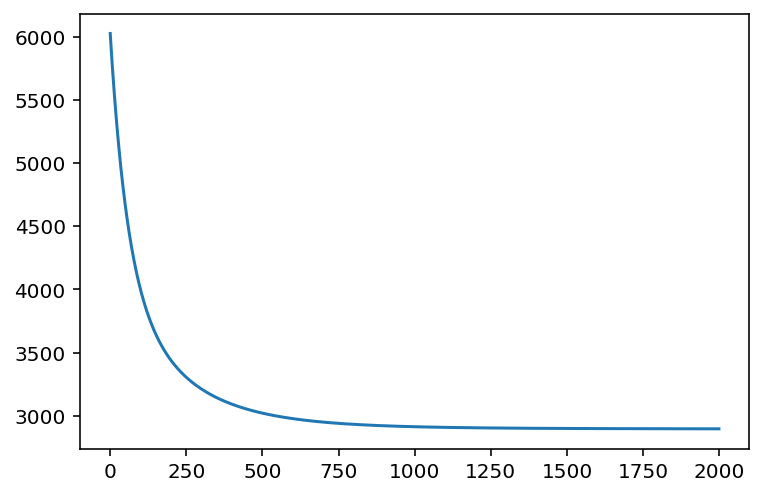

In [15]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [16]:
W, b

(array([  39.92960896, -236.72427209,  550.34860877,  340.34308047,
         -98.35336377, -126.91345748, -215.70120707,  148.9795987 ,
         411.14672297,   71.82600706]),
 151.3037678993478)

In [17]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2880.238091811425

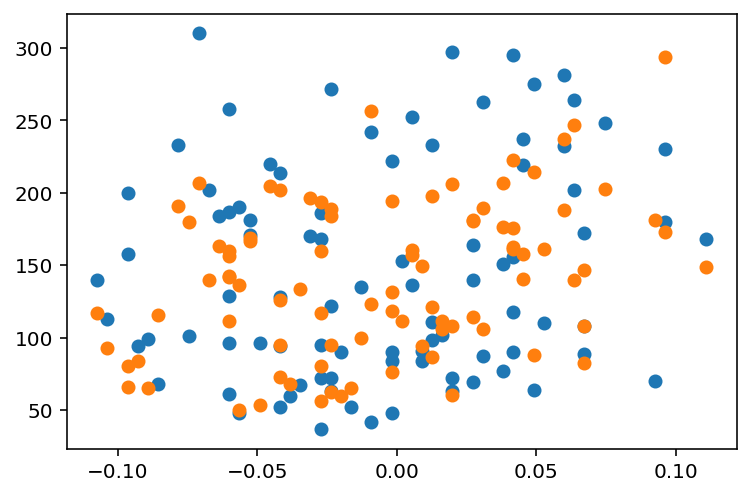

In [18]:
plt.scatter(X_test[:, 0], y_test) #파란색이 실제
plt.scatter(X_test[:, 0], prediction) #주황색이 예측
plt.show()

## 1번 프로젝트 전체 평가
- 함수로 구현하여 회귀분석을 진행한것은 처음이어서 조금 생소했다.
- 처음에는 learning rate를 0.0001로 주고 학습을 하니 loss값이 잘떨어지지 않았다.
- 그래서 학습수를 +1000회 늘리고, learning rate를 0.5로 바꿔보니 loss값이 잘 떨어졌다.
- 학습을 할때는 역시 epochs나 learning rate 나 기타 파라미터들이 제일 많은 영향을 주는것 같다.

# 프로젝트2-날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## 데이터 불러오기

In [19]:
bike = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
- https://jimmy-ai.tistory.com/156 참고

In [20]:
bike['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [21]:
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [22]:
bike['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [23]:
bike['years'] = bike['datetime'].dt.year # 연도 정보
bike['month'] = bike['datetime'].dt.month # 월 정보
bike['day'] = bike['datetime'].dt.day # 일 정보
bike['hour'] = bike['datetime'].dt.hour # 시간 정보
bike['minute'] = bike['datetime'].dt.minute # 분 정보
bike['second'] = bike['datetime'].dt.second # 초 정보

In [24]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,years,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## year, month, day, hour, minute, second 데이터 개수 시각화하기
- sns.countpplot 활용해서 시각화하기
- subplot 활용해서 한 번에 6개의 그래프 함께 시각화하기
- https://gibles-deepmind.tistory.com/54?category=892465 참고
- https://mintaewon.github.io/2021/01/kaggle-%EC%9E%90%EC%A0%84%EA%B1%B0-%EC%88%98%EC%9A%94-%EC%98%88%EC%B8%A1bike-sharing-demand-1eda/ 참고

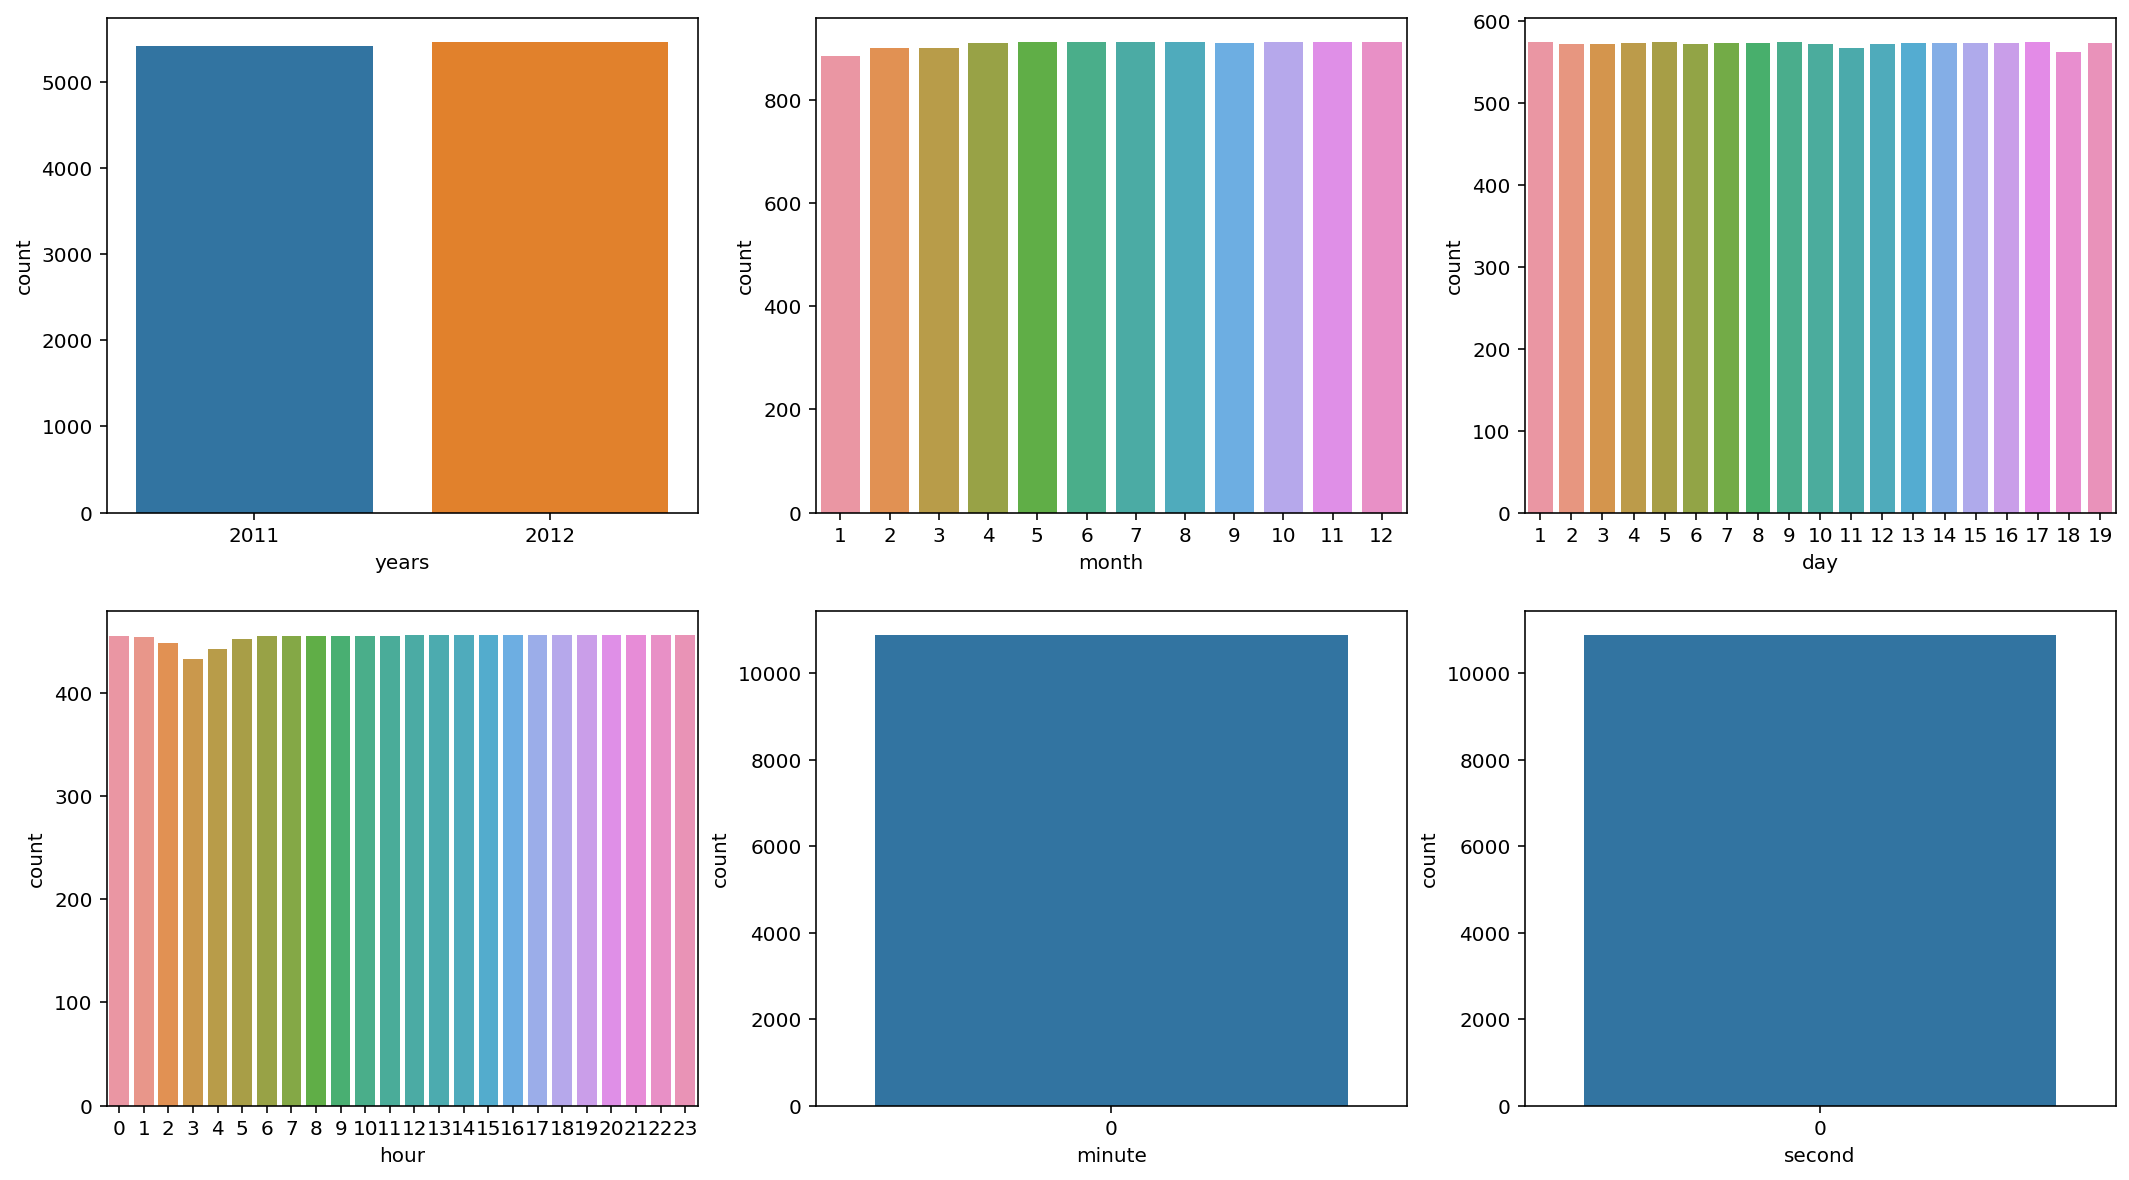

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols = 3, figsize=(18, 10))

sns.countplot(x='years', data=bike, ax = ax[0,0])
sns.countplot(x='month', data=bike, ax = ax[0,1])
sns.countplot(x='day', data=bike, ax = ax[0,2])
sns.countplot(x='hour', data=bike, ax = ax[1,0])
sns.countplot(x='minute', data=bike, ax = ax[1,1])
sns.countplot(x='second', data=bike, ax = ax[1,2])
plt.show()

/tmp/ipykernel_108/1318040177.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  bike[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins=50, ax=ax)


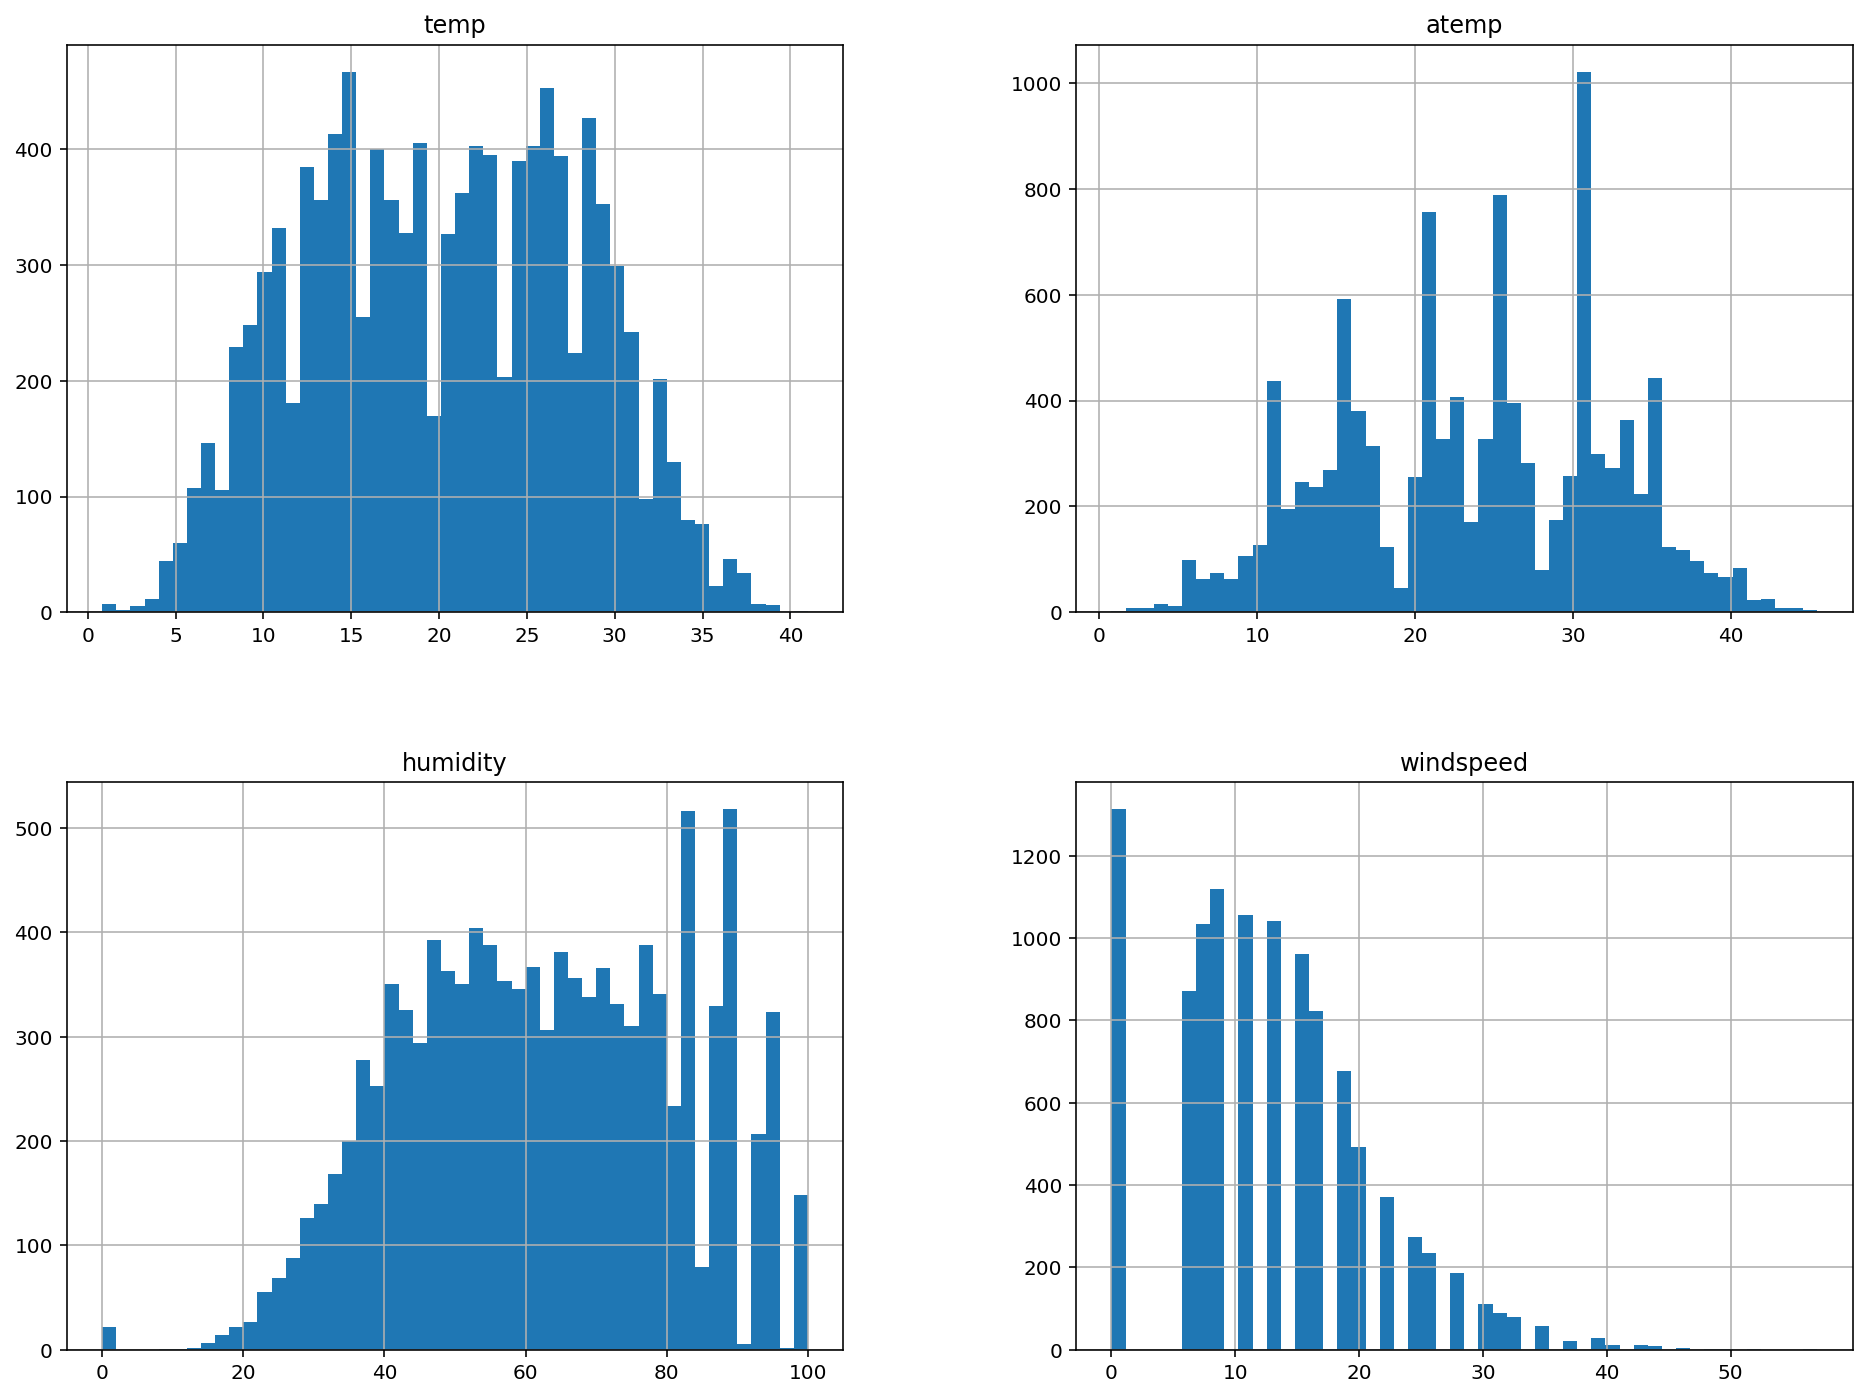

In [26]:
fig, ax = plt.subplots(figsize=(16,12))

# temp, atemp, humidity, windspeed 의 히스토그램
bike[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins=50, ax=ax)
 
plt.show()

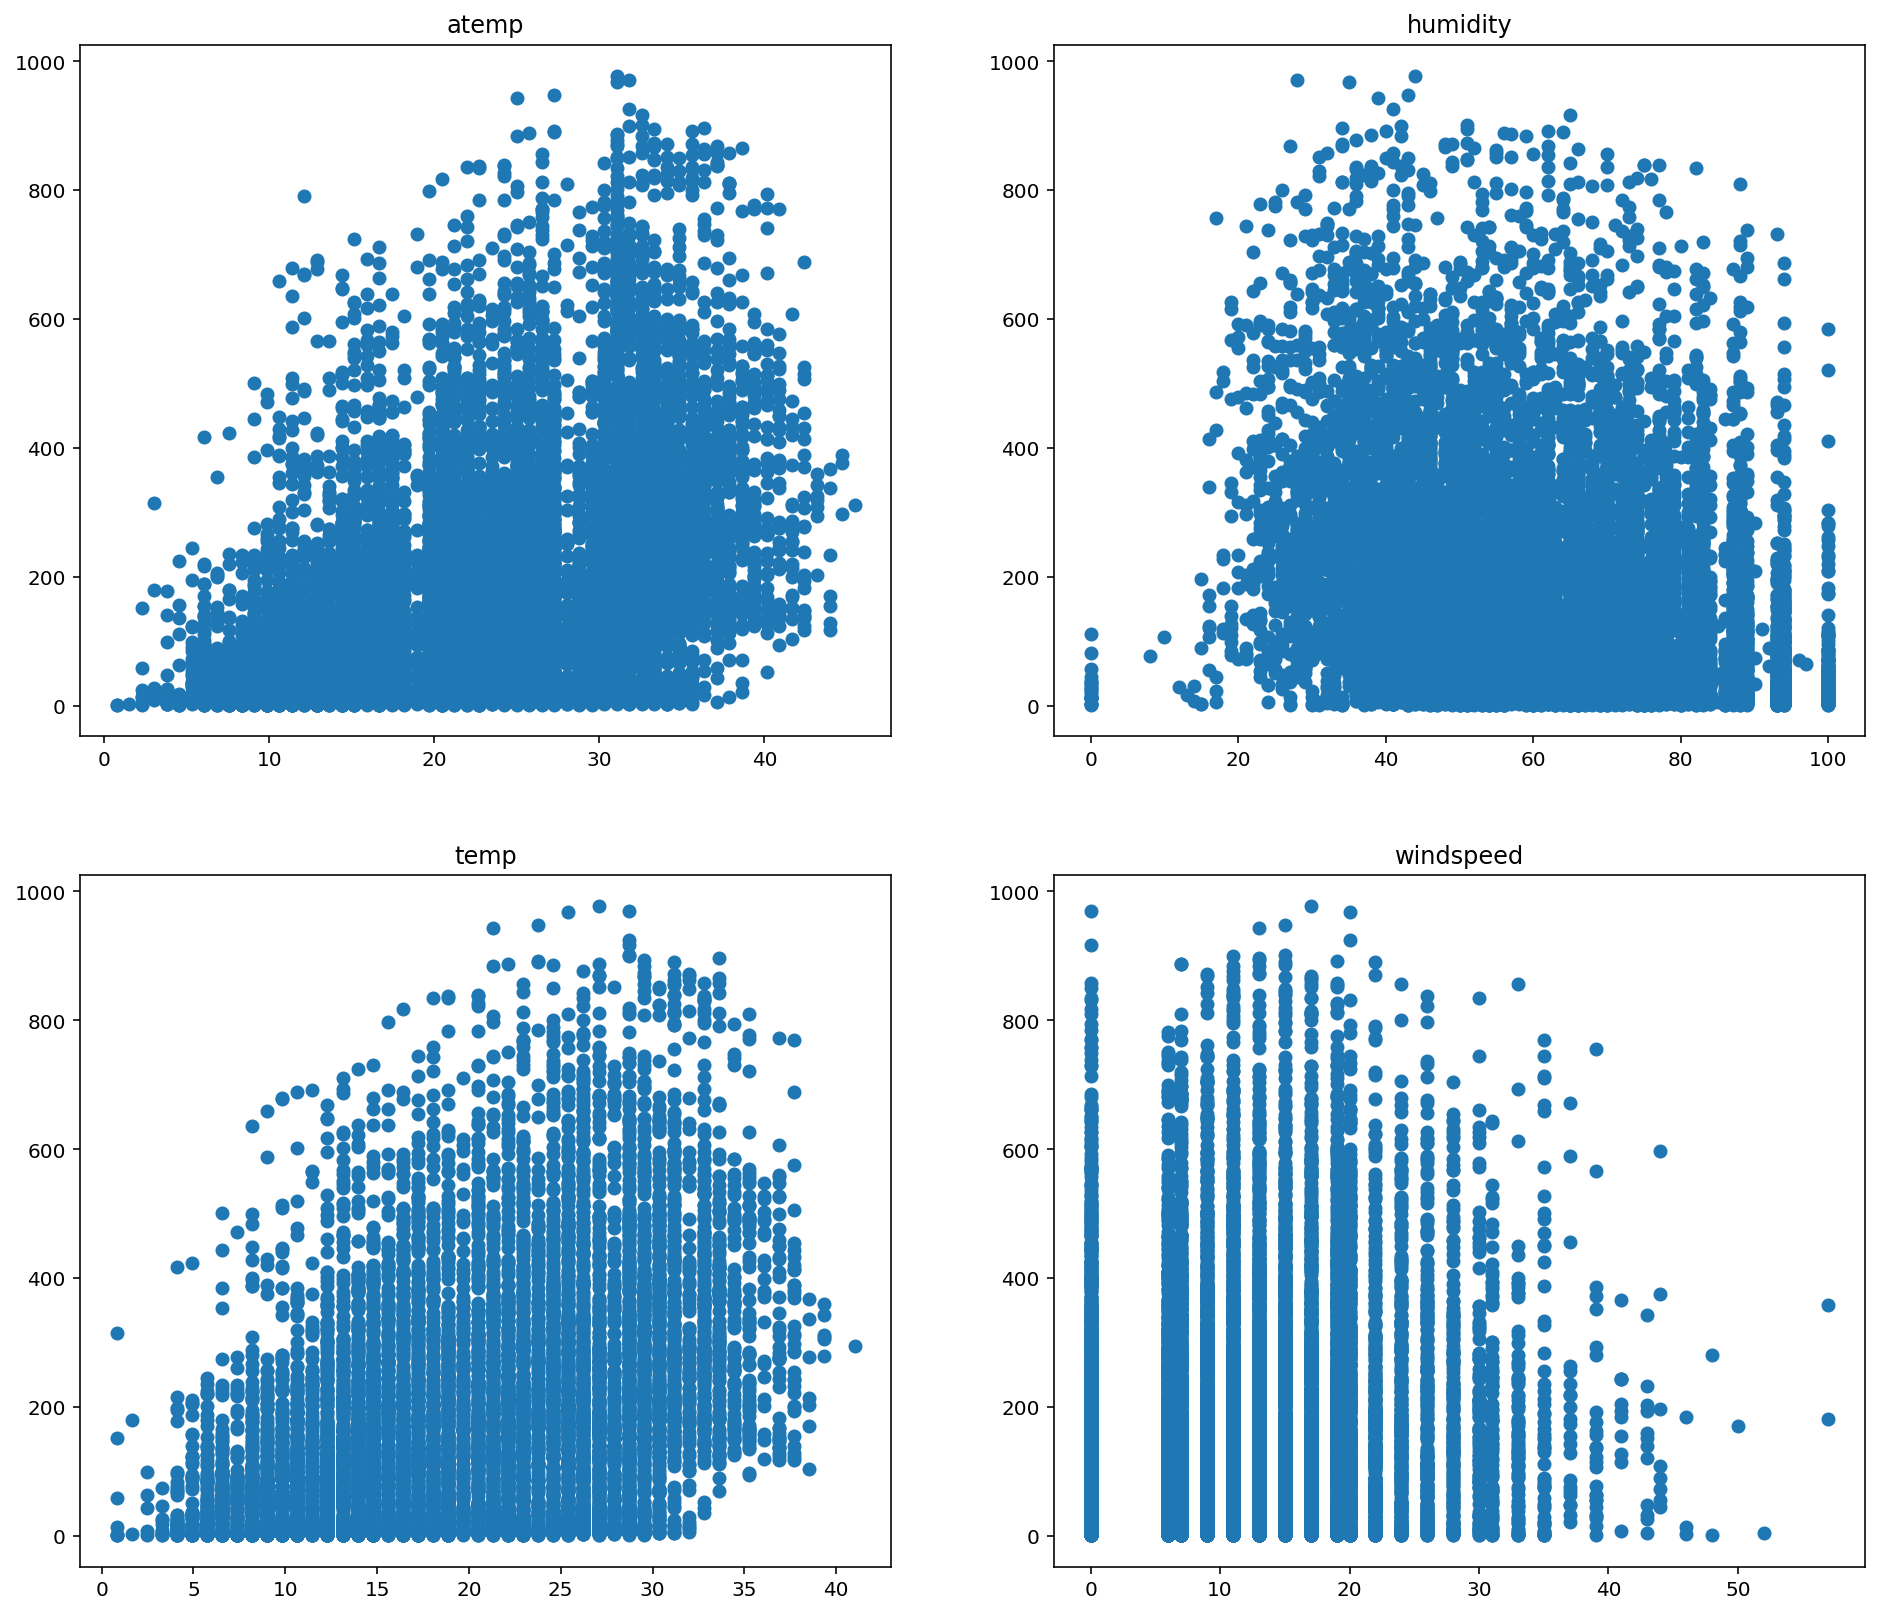

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(16,14))
 
# scatter plot
ax[0][0].scatter(bike['atemp'], bike['count'])
ax[0][1].scatter(bike['humidity'], bike['count'])
ax[1][0].scatter(bike['temp'], bike['count'])
ax[1][1].scatter(bike['windspeed'], bike['count'])
 
# title 지정
ax[0][0].set(title='atemp')
ax[0][1].set(title='humidity')
ax[1][0].set(title='temp')
ax[1][1].set(title='windspeed')
 
plt.show()

## X, y 컬럼 선택 및 train/test 데이터 분리

In [28]:
bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'years', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [32]:
X = bike[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','years', 'month', 'day', 'hour']].values
y = bike[['count']].values

#'datetime','casual', 'registered'과 0인 'minute', 'second' 것은 제거하고 돌려봄

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 12) (8708, 1)
(2178, 12) (2178, 1)


In [34]:
X_train

array([[ 3.,  0.,  1., ...,  7.,  6.,  5.],
       [ 3.,  0.,  0., ...,  8.,  4., 16.],
       [ 3.,  0.,  1., ...,  7., 11., 15.],
       ...,
       [ 4.,  0.,  0., ..., 12., 18., 16.],
       [ 1.,  0.,  0., ...,  2., 19.,  7.],
       [ 2.,  0.,  1., ...,  5.,  2.,  7.]])

## LinearRegression 모델 학습

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)
y_pred

array([[248.10627003],
       [ 48.79765547],
       [200.90676727],
       ...,
       [309.7528022 ],
       [ 38.17030198],
       [243.62697388]])

In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

19945.37005375412

In [40]:
rmse = np.sqrt(mse)
rmse

141.22807813517156

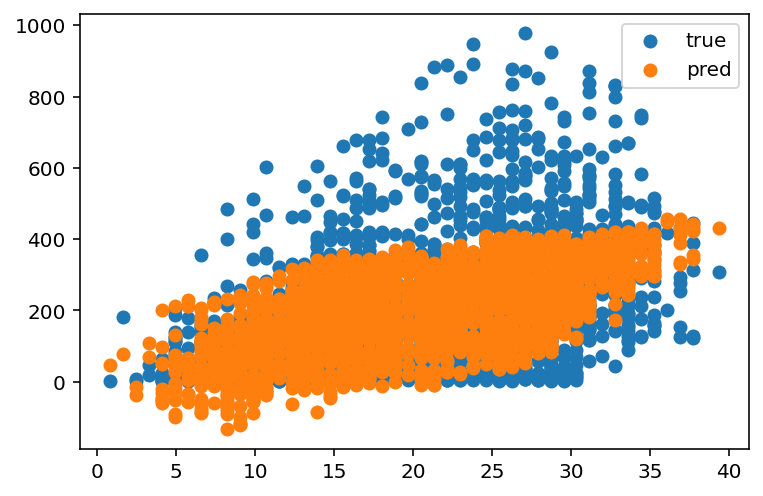

In [42]:
#temp

plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], y_pred, label="pred")
plt.legend()
plt.show()

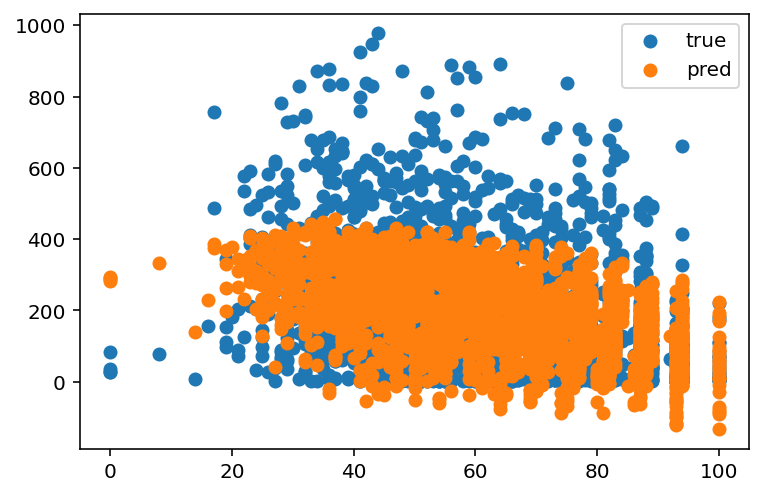

In [43]:
#humidity

plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], y_pred, label="pred")
plt.legend()
plt.show()

## SVM 모델로 학습해보기

In [51]:
from sklearn.svm import SVR

for i in (0.1, 1, 10, 100, 1000):
    for j in (0.1, 1, 10, 100, 1000):
        model = SVR(kernel = 'rbf', C=i, gamma = j)
        model.fit(X_train, y_train)
        relation_square = model.score(X_train, y_train)
        print('C가 {}, gamma가 {}일때 결정계수 R : {}'.format(i, j, relation_square))
        
#C는 데이터 샘플들이 다른 클래스에 놓이는 것을 허용결정, gamma는 결정경계의 곡률 결정
#https://data-workspace.tistory.com/33 참고

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 0.1, gamma가 0.1일때 결정계수 R : -0.0641593834162566


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 0.1, gamma가 1일때 결정계수 R : -0.06496127377847327


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 0.1, gamma가 10일때 결정계수 R : -0.06500824759231105


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 0.1, gamma가 100일때 결정계수 R : -0.06500825235709651


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 0.1, gamma가 1000일때 결정계수 R : -0.06500825235709651


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 1, gamma가 0.1일때 결정계수 R : -0.049166353002158436


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 1, gamma가 1일때 결정계수 R : -0.05687147702850415


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 1, gamma가 10일때 결정계수 R : -0.05728439532319074


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 1, gamma가 100일때 결정계수 R : -0.05728443469557343


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 1, gamma가 1000일때 결정계수 R : -0.05728443469557343


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 10, gamma가 0.1일때 결정계수 R : 0.08280053650105046


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 10, gamma가 1일때 결정계수 R : 0.01796174485425417


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 10, gamma가 10일때 결정계수 R : 0.014306383861650285


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 10, gamma가 100일때 결정계수 R : 0.014306024841738929


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 10, gamma가 1000일때 결정계수 R : 0.014306024841738929


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 100, gamma가 0.1일때 결정계수 R : 0.7015140048495474


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 100, gamma가 1일때 결정계수 R : 0.5396459766493449


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 100, gamma가 10일때 결정계수 R : 0.5243913276339953


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 100, gamma가 100일때 결정계수 R : 0.5243895796261833


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 100, gamma가 1000일때 결정계수 R : 0.5243895796261833


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 1000, gamma가 0.1일때 결정계수 R : 0.9984365266043586


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 1000, gamma가 1일때 결정계수 R : 0.9999996951831195


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 1000, gamma가 10일때 결정계수 R : 0.9999996947630179


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 1000, gamma가 100일때 결정계수 R : 0.9999996947836167


/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C가 1000, gamma가 1000일때 결정계수 R : 0.9999996947836167


In [52]:
model = SVR(kernel = 'rbf', C=100, gamma = 0.1)
model.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, gamma=0.1)

In [53]:
y_pred = model.predict(X_test)
y_pred

array([176.60798765,  24.34430452, 155.99809842, ..., 287.37210295,
        37.77181647, 180.90001106])

In [54]:
mse = mean_squared_error(y_test, y_pred)
mse

21940.287223864118

In [55]:
rmse = np.sqrt(mse)
rmse

148.12254124158184

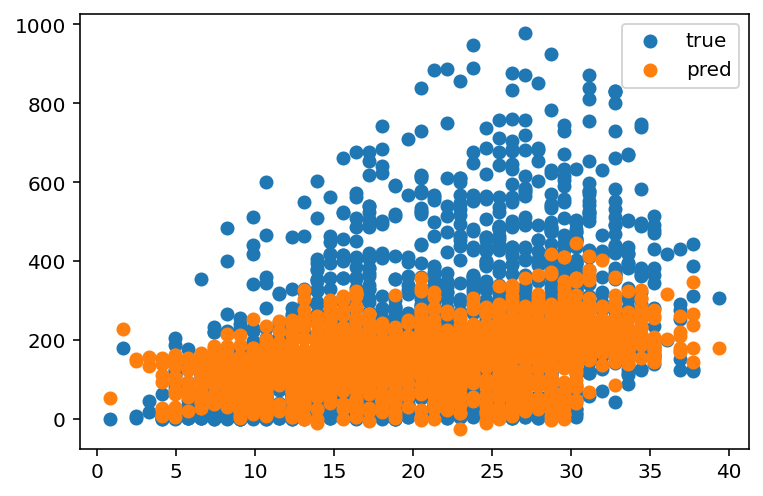

In [56]:
#temp

plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], y_pred, label="pred")
plt.legend()
plt.show()

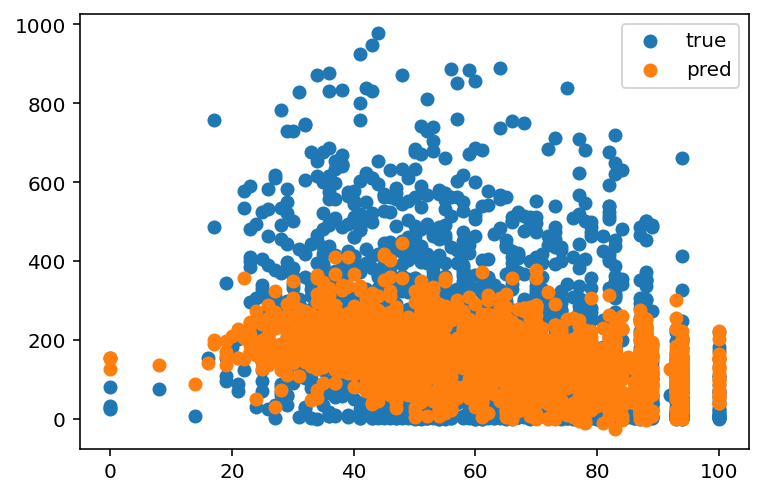

In [57]:
#humidity

plt.scatter(X_test[:, 6], y_test, label="true")
plt.scatter(X_test[:, 6], y_pred, label="pred")
plt.legend()
plt.show()

## 2번 프로젝트 전체 평가
- casual과 registered를 합치니 count의 합이 되어 모델에 많은 영향을 준거 같다.
- 그래서 해당 변수를 제외하고 분이나 초처럼 0인 값들을 제거하고 모델을 학습시켰더니 상세기준에 만족하는 RSME 값을 얻을 수 있었던것 같다.
- 추가적으로 SVR 모델도 돌려보았는데, 해당 모델은 C나 gamma의 조절을 잘 해야될것 같다.
- 결정계수가 99%면 뭔가 과적합일거 같다는 생각이 든다.
- 그래서 99%가 아닌 그 다음으로 높은 C와 gamma를 선택해도 낮은 RSME값을 얻을수 있었다.

# 회고
-
- 전체적으로는 변수들을 잘 조합하거나 빼기 위해서는 시각화를 하는 작업이 중요하다고 느꼈다.
- 목적 변수와 해당 변수간의 관계나 계수등을 확인해서 Feature engineering을 해주면 모델의 성능을 향상시킬 수 있을것 같다.
- 앞으로는 좀 더 체계적으로 EDA를 할 수 있도록 프로젝트마다 연습을 계속 해야 할것 같다.
- EDA만 잘해도 이 변수를 왜 선택했고, 뺐는지 설명이 쉬워질것으로 생각된다.
- sns나 plt등 시각화 라이브러리에 대해 정리를 해야겠다.